In [3]:
# Testing the environment

import cv2
import numpy as np

# Testing the OpenCV version
print("OpenCV : ",cv2.__version__)


# Testinng the numpy version
print("Numpy : ",np.__version__)


OpenCV :  3.2.0-dev
Numpy :  1.12.1


Shapes found :  10


<IPython.core.display.Javascript object>


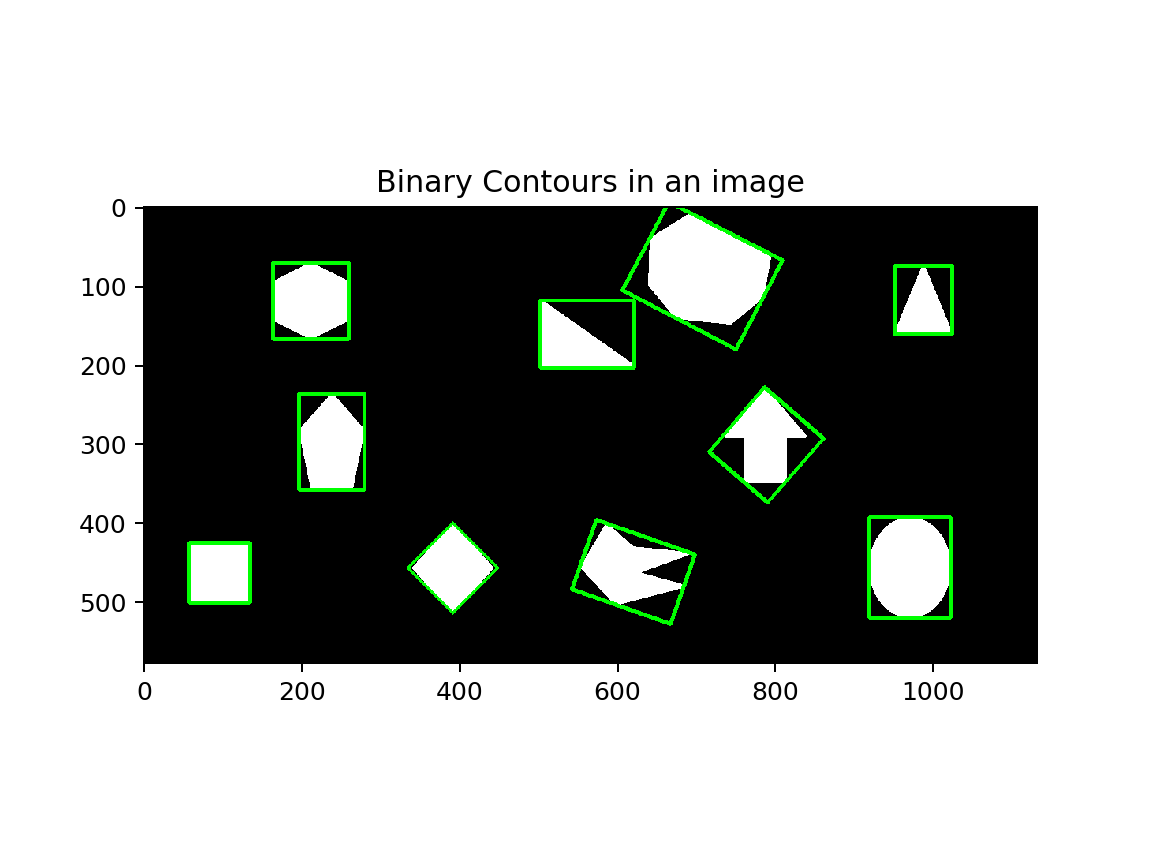

In [32]:
# Finding and drawing contours in an image (Eg 1: Binary Image)

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

img = cv2.imread('resources/images/shapes.png')
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Note: The image is already thresholded and we can simply call the getContours function from the OpenCV library
_, contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# We know that the input image has 10 shapes, and lets see if the library could find all these 10 contours
print("Shapes found : ", len(contours)) # should return 10

#now lets draw these contours
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(img, [box], 0, (0, 255, 0), 3)


plt.figure("Example 1")
plt.imshow(img)
plt.title('Binary Contours in an image')
plt.show()




Coins found :  6


<IPython.core.display.Javascript object>


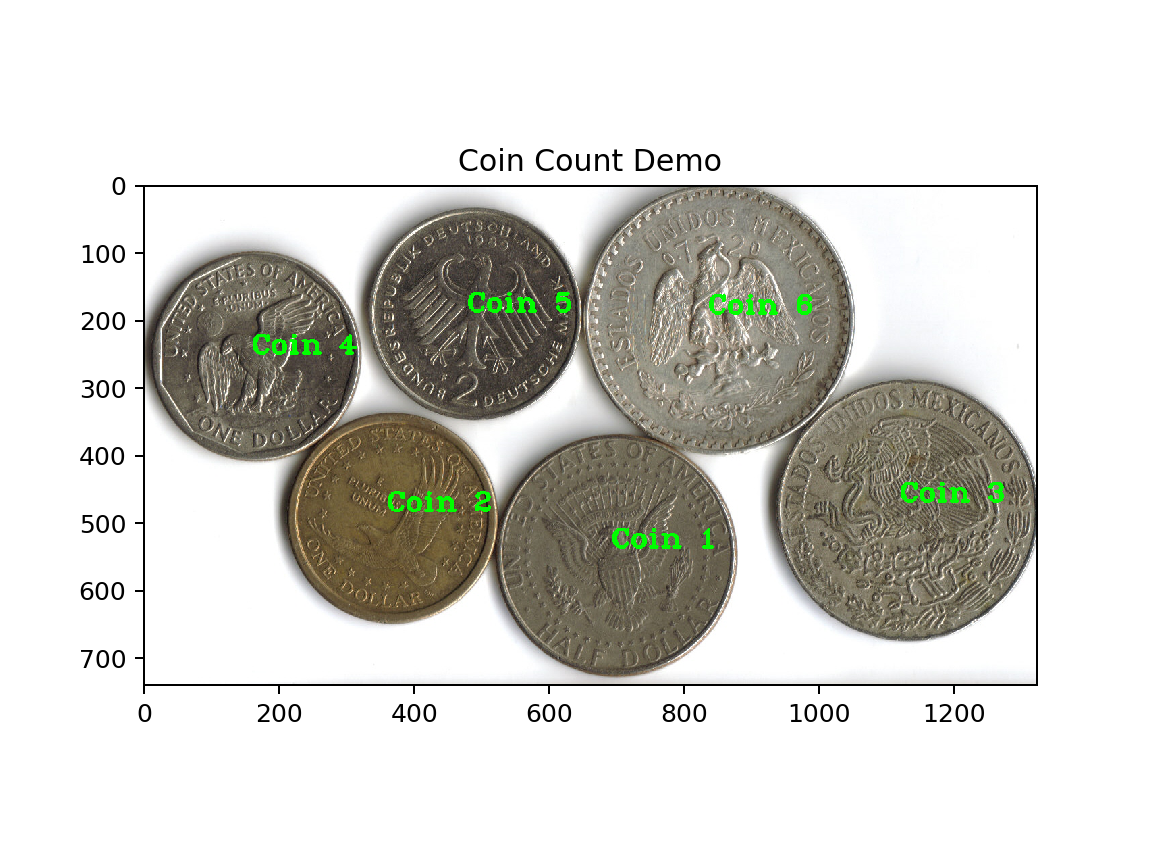

In [106]:
# Counting the number of coins in an image

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# Reading the coins image
img = mpimg.imread('resources/images/coins.jpg')

# Converting the image to grayscale or 8U
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Smoothing the image
image = cv2.GaussianBlur(image, (19, 19), 0)

# Thresholding the image
_,image = cv2.threshold(image,225,255,cv2.THRESH_BINARY_INV)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel, iterations = 2)
     
# Finding foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, image = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
   
# Finding unknown region
image = np.uint8(image)

#Note: The image is already thresholded and we can simply call the getContours function from the OpenCV library
_, contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# We know that the input image has 6 coins, lets see what we get
print("Coins found : ", len(contours)) # should return 10

#now lets draw these contours
for i,cnt in enumerate(contours):
    (x,y),_ = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    cv2.putText(img, "Coin {0}".format(i+1),center, 
    cv2.FONT_HERSHEY_COMPLEX_SMALL, 2 ,(0, 255, 0), 3);
    #img = cv2.drawContours(img, [box], 0, (0, 255, 0), 3)



plt.figure("Example 2")
plt.imshow(img)
plt.title('Coin Count Demo')
plt.show()



<IPython.core.display.Javascript object>


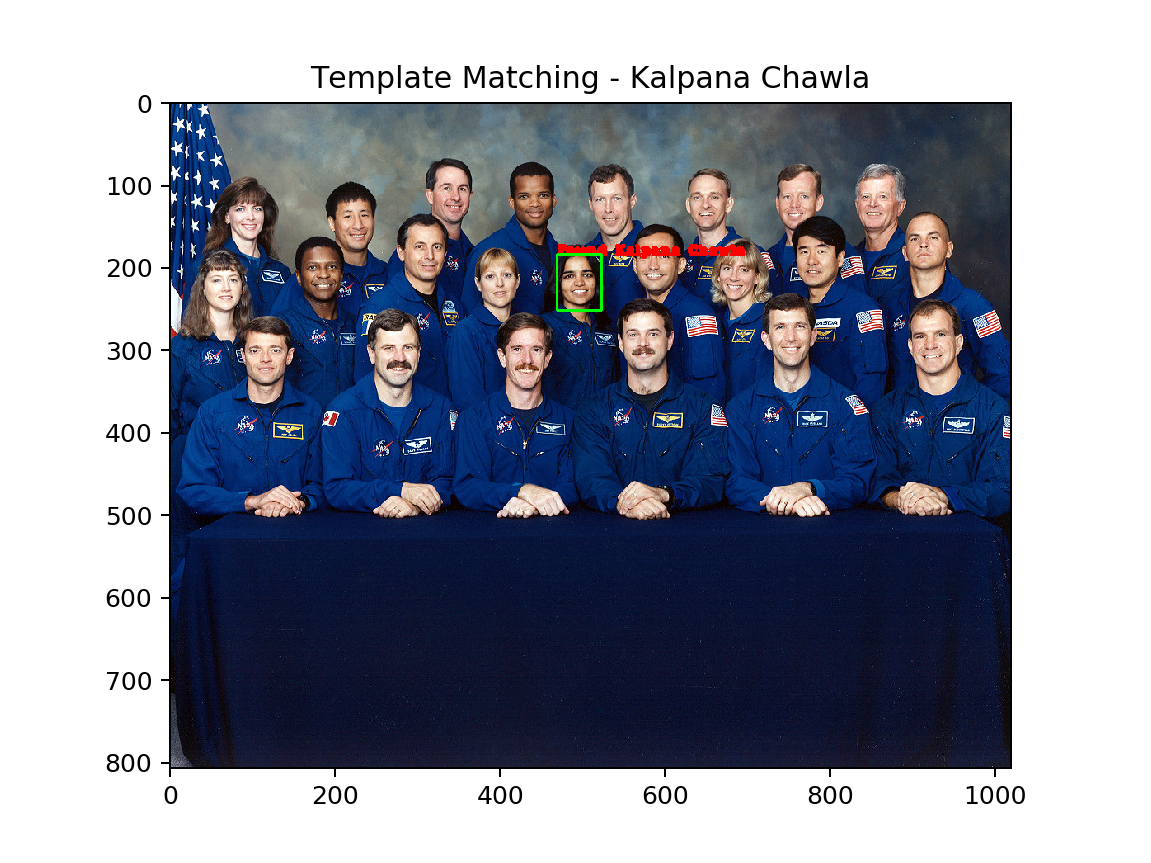

In [137]:
# Template matching finding a face in an image

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# She was the first woman of indian origin in Space
# In 2003, Chawla was one of the seven crew members who died in the Space Shuttle Columbia disaster
# https://en.wikipedia.org/wiki/Kalpana_Chawla
target_name = "Kalpana Chawla"  

# Reading the original image
img   = mpimg.imread('resources/images/kchawla.jpg')
image = img.copy()

# Converting the copy of the image to grayscale
image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Reading the template of the image of kalpana chawla
template = cv2.imread("resources/images/kc_template.png",0)
w, h = template.shape[::-1]

#converting the images to uint8 type
image = np.uint8(image)
template = np.uint8(template)

# performing the actual template matching on the image
res = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)

# calculating the bounds of the template to be plotted in the next step
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# rendering the boundary and the description for the template
cv2.putText(img, "Found {0}".format(target_name),top_left, 
    cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8 ,255, 3);
cv2.rectangle(img,top_left, bottom_right, (0,255,0), 2)

plt.figure("Example 3")
plt.imshow(img)
plt.title('Template Matching - Kalpana Chawla')
plt.show()




In [1]:
%pylab inline 

import numpy as np
import cv2
from IPython.display import clear_output

vid = cv2.VideoCapture("resources/images/cctv.mp4")
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

fgbg = cv2.createBackgroundSubtractorMOG2()

try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            vid.release()
            break
        
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        fgmask = fgbg.apply(frame)
        fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
        
        # Turn off the axis
        axis('off')
        
        # Title of the window
        title("Input Stream")
        
        # Display the frame
        imshow(fgmask)
        show()
        
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    


In [11]:
#------------------------------------------------------------------
# TinAlgo
#
# An Incremental Algorithm for the Construction of Delauny Diagram
# author: bcheung 2013-05-07
# http://bennycheung.github.io/
#------------------------------------------------------------------

import math
import sys
import getopt
import time
TOL = 1e-6
BIG_FLOAT = 1e38

#------------------------------------------------------------------
# Computational Geometry functions
#------------------------------------------------------------------
"""
* Find the Circum-center of a circle which enclosed the given topological element.
* This algorithm copied from "A programmer geometry" by Adrian Bowyer p66.
* Computational expensive.
"""
def triCircumCenter(p0, p1, p2):
    xl = p0.x
    yl = p0.y
    xk = p1.x
    yk = p1.y
    xm = p2.x
    ym = p2.y

    xlk = xl - xk
    ylk = yl - yk
    xmk = xm - xk
    ymk = ym - yk
    det = xlk * ymk - xmk * ylk

    detinv = 0.5 / det
    rlksq = xlk * xlk + ylk * ylk
    rmksq = xmk * xmk + ymk * ymk
    xcc = detinv * (rlksq * ymk - rmksq * ylk)
    ycc = detinv * (xlk * rmksq - xmk * rlksq)
    return Site(xcc + xk, ycc + yk)

"""
* Returns twice the area of the oriented triangle (a, b, c), i.e., the
* area is positive if the triangle is oriented counterclockwise.
"""
def triArea(a, b, c):
    return (b.x - a.x)*(c.y - a.y) - (b.y - a.y)*(c.x - a.x)

"""
* Returns True if the point d is inside the circle defined by the
* points a, b, c. See Guibas and Stolfi (1985) p.107.
"""
def triInCircle(a, b, c, d):
    t1 = (a.x*a.x + a.y*a.y) * triArea(b, c, d)
    t2 = (b.x*b.x + b.y*b.y) * triArea(a, c, d)
    t3 = (c.x*c.x + c.y*c.y) * triArea(a, b, d)
    t4 = (d.x*d.x + d.y*d.y) * triArea(a, b, c)
    return (t1 - t2 + t3 - t4) > 0

"""
* Returns True if the points a, b, c are in a counterclockwise order
"""
def triCCW(a, b, c):
    return triArea(a, b, c) > 0

"""
* Point is on the right face of an Edge
"""
def rightOfEdge(p, e):
    return triCCW(p, e.dest(), e.org())

"""
* Point is on the left face of an Edge
"""
def leftOfEdge(p, e):
    return triCCW(p, e.org(), e.dest())

"""
* A predicate that determines if the point x is on the edge e.
* The point is considered on if it is in the EPS-neighborhood
* of the edge.
"""
def onEdge(p, e):
    xOrg = p - e.org()
    xDest = p - e.dest()
    orgDest = e.org() - e.dest();

    t1 = xOrg.length()
    t2 = xDest.length()
    if (t1 < TOL or t2 < TOL):
        return True
    t3 = orgDest.length();
    if (t1 > t3 or t2 > t3):
        return False
    line = LineEqn(e.org(), e.dest())
    return (math.fabs(line.eval(p)) < TOL);


#------------------------------------------------------------------
"""
* Site Class
*
* Data structure to represent a Site (x,y), with index
"""
class Site(object):
    def __init__(self,x=0.0,y=0.0,sitenum=0):
        self.x = x
        self.y = y
        self.sitenum = sitenum  # reference site index

    def __str__(self):
        return "(%.3f,%.3f)" % (self.x, self.y)

    def __repr__(self):
        return "(%d,%.3f,%.3f)" % (self.sitenum, self.x, self.y)

    def __eq__(self, other):
        return math.fabs(self.x - other.x) < TOL and math.fabs(self.y - other.y) < TOL

    def __add__(self, other):
        return Site(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Site(self.x - other.x, self.y - other.y)

    def length(self):
        return math.sqrt(self.x * self.x + self.y * self.y)

    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return math.sqrt(dx*dx + dy*dy)


#------------------------------------------------------------------
"""
* SiteList Class
*
* Data structure to represent a list of Sites
"""
class SiteList(object):
    def __init__(self,pointList):
        self.__sites = []
        self.__sitenum = 0

        self.__xmin = pointList[0].x
        self.__ymin = pointList[0].y
        self.__xmax = pointList[0].x
        self.__ymax = pointList[0].y
        for i,pt in enumerate(pointList):
            self.__sites.append(Site(pt.x,pt.y,i))
            if pt.x < self.__xmin: self.__xmin = pt.x
            if pt.y < self.__ymin: self.__ymin = pt.y
            if pt.x > self.__xmax: self.__xmax = pt.x
            if pt.y > self.__ymax: self.__ymax = pt.y
        # self.__sites.sort()

    def setSiteNumber(self,site):
        site.sitenum = self.__sitenum
        self.__sitenum += 1

    class Iterator(object):
        def __init__(this,lst):  this.generator = (s for s in lst)
        def __iter__(this):      return this
        def next(this):
            try:
                return this.generator.next()
            except StopIteration:
                return None

    def iterator(self):
        return SiteList.Iterator(self.__sites)

    def __iter__(self):
        return SiteList.Iterator(self.__sites)

    def __len__(self):
        return len(self.__sites)

    def _getxmin(self): return self.__xmin
    def _getymin(self): return self.__ymin
    def _getxmax(self): return self.__xmax
    def _getymax(self): return self.__ymax
    xmin = property(_getxmin)
    ymin = property(_getymin)
    xmax = property(_getxmax)
    ymax = property(_getymax)


#------------------------------------------------------------------
"""
* Edge Class
*
* Represent an edge for the triangle.
* The following picture illustrates the result of the edge operators:
*
* lnext <----------  dest -----------> rprev
* dprev  ---------->     <-----------  dnext
*                    ^ sym
*                    | |
*                    | |
* Left               | |
* Face         <-----+-+----  rot
*       invrot  -----+-+---->        Right
*                    | |             Face
*                    | |
*                    | |
*                    e V
* onext <---------         ----------> oprev
* lprev  --------->  org  <----------  rnext
*
*
* Edge Operators Algebra:
*   e      = current edge, directed from org to dest
*   sym    = current edge, directed from dest to org
*   rot    = dual of current edge, directed from right to left
*   invrot = dual of current edge, directed from left to right
*   onext  = next ccw edge around orgin
*   oprev  = rot->onext->rot
*   dnext  = sym->onext->sym
*   dprev  = invrot->onext->invrot
*   lnext  = invrot->onext->rot
*   lprev  = onext->sym
*   rnext  = rot->onext->invrot
*   rprev  = sym->onext
*
"""
class Edge(object):

    """
    * Make a new Edge, including QuadEdge structure
    """
    @staticmethod
    def MakeEdge():
        ql = QuadEdge()
        return ql._e[0]

    """
    * This operator affects the two edge rings around the origins of a and b,
    * and, independently, the two edge rings around the left faces of a and b.
    * In each case, (i) if the two rings are distinct, sSplice will combine
    * them into one; (ii) if the two are the same ring, sSplice will break it
    * into two separate pieces.
    * Thus, sSplice can be used both to attach the two edges together, and
    * to break them apart. See Guibas and Stolfi (1985) p.96 for more details
    * and illustrations.
    """
    @staticmethod
    def Splice(a, b):
        alpha = a.onext().rot()
        beta = b.onext().rot()
        t1 = b.onext()
        t2 = a.onext()
        t3 = beta.onext()
        t4 = alpha.onext()
        a._next = t1
        b._next = t2
        alpha._next = t3;
        beta._next = t4

    """
    * Delete an Edge, reconnecting with neighbors
    """
    @staticmethod
    def DeleteEdge(e):
        Edge.Splice(e, e.oprev())
        Edge.Splice(e.sym(), e.sym().oprev())

    def __init__(self):
        self._num = 0
        self._data = None
        self._next = None
        self._qedge = None

    def __str__(self):
        return "[%s,%s]" % (self.org(), self.dest())

    def __repr__(self):
        return "[%s,%s]" % (self.org(), self.dest())

    # Return the dual of the current edge, directed from its right to its left.
    def rot(self):
        if (self._num < 3):
            return self._qedge._e[self._num + 1]
        else:
            return self._qedge._e[self._num - 3]

    # Return the dual of the current edge, directed from its left to its right.
    def invrot(self):
        if (self._num > 0):
            return self._qedge._e[self._num - 1]
        else:
            return self._qedge._e[self._num + 3]

    # Return the edge from the destination to the origin of the current edge.
    def sym(self):
        if (self._num < 2):
            return self._qedge._e[self._num + 2]
        else:
            return self._qedge._e[self._num - 2]

    # Return the next ccw edge around (from) the origin of the current edge.
    def onext(self):
        return self._next

    # Return the next cw edge around (from) the origin of the current edge.
    def oprev(self):
        return self.rot().onext().rot()

    # Return the next ccw edge around (into) the destination of the current edge.
    def dnext(self):
        return self.sym().onext().sym()

    # Return the next cw edge around (into) the destination of the current edge.
    def dprev(self):
        return self.invrot().onext().invrot()

    # Return the ccw edge around the left face following the current edge.
    def lnext(self):
        return self.invrot().onext().rot()

    # Return the ccw edge around the left face before the current edge.
    def lprev(self):
        return self.onext().sym()

    # Return the edge around the right face ccw following the current edge.
    def rnext(self):
        return self.rot().onext().invrot()

    # Return the edge around the right face ccw before the current edge.
    def rprev(self):
        return self.sym().onext()

    # Return the origin data point.
    def org(self):
        return self._data

    # Return the destination data point.
    def dest(self):
        return self.sym()._data

    # Assign the 2 end points value.
    def endPoints(self, org, dst):
        self._data = org
        self.sym()._data = dst

    # Return the quad edge data structure.
    def qedge(self):
        return _qedge

#------------------------------------------------------------------
"""
* QuadEdge Class
*
* The quad edge data structure.
* The following is the picture illustration of the quad edge data structure.
*
*             dst
*   Left Face  x     Right Face
*             ^ |sym
*             | |[2]
*             | |      rot
*      <------+-+----- [1]
*  invrot     | |
*    [3] -----+-+----->
*             | |
*           e | |
*          [0]| V
*              x
*             org
*
* Edge Description:
*   e      [0] = current edge, directed from org to dest
*   rot    [1] = dual of current edge, directed from right to left
*   sym    [2] = current edge, directed from dest to org
*   invrot [3] = dual of current edge, directed from left to right
*
"""
class QuadEdge(object):
    """
    * The QuadEdge e[4]
    """
    def __init__(self):
        self._e = 4*[None]
        self._e[0] = Edge()
        self._e[0]._num = 0
        self._e[1] = Edge()
        self._e[1]._num = 1
        self._e[2] = Edge()
        self._e[2]._num = 2
        self._e[3] = Edge()
        self._e[3]._num = 3

        self._e[0]._next = self._e[0]
        self._e[1]._next = self._e[3]
        self._e[2]._next = self._e[2]
        self._e[3]._next = self._e[1]

        self._e[0]._qedge = self
        self._e[1]._qedge = self
        self._e[2]._qedge = self
        self._e[3]._qedge = self

        self.mark = 0

#------------------------------------------------------------------
"""
* LineEqn Class
*
* Line equation support class
"""
class LineEqn(object):
    def __init__(self):
        self._a = 0
        self._b = 0
        self._c = 0

    """
    * Computes the normalized line equation through the points p and q.
    """
    def __init__(self, p, q):
        t = q - p
        len = t.length()
        self._a = t.y / len
        self._b = -t.x / len
        self._c = -(self._a*p.x + self._b*p.y)

    """
    * Plugs point p into the line equation.
    """
    def eval(self, p):
        return (self._a * p.x + self._b * p.y + self._c)

#------------------------------------------------------------------
"""
* TinBuilder Class
*
* The Triangulated Irregular Network construction class.
* The construction is based on the quad edge data structure.
* The data structure and algorithms are based on the paper:
*
* Leonidas Guibas and Jorge Stolfi,
*   "Primitives for the Manipulation of General Subdivisions and
*   the Computation of Voronoi Diagrams",
*   ACM Trans. on Graphics, Vol 4. no.2, April 1985, pp 75-123.
*
"""
class TinBuilder(object):

    """
    * Initialize a subdivision to the triangle defined by the bounding box
    * The bounding box is specified by (min X, max X) and (min Y, max Y)
    """
    def __init__(self, minx, maxx, miny, maxy):
        pt = 5*[None]
        pt[0] = Site()
        pt[0].x = minx - TOL
        pt[0].y = miny - TOL
        pt[1] = Site()
        pt[1].x = minx - TOL
        pt[1].y = maxy + TOL
        pt[2] = Site()
        pt[2].x = maxx + TOL
        pt[2].y = maxy + TOL
        pt[3] = Site()
        pt[3].x = maxx + TOL
        pt[3].y = miny - TOL
        pt[4] = Site()
        pt[4].x = minx - TOL
        pt[4].y = miny - TOL
        e = 4*[None]
        e[0] = Edge.MakeEdge()
        e[0].endPoints(pt[1], pt[0])
        for i in range(1, 4):
            e[i] = Edge.MakeEdge()
            e[i].endPoints(pt[i + 1], pt[i])
            Edge.Splice(e[i].sym(), e[i-1])
        Edge.Splice(e[3], e[0].sym())
        self._startEdge = e[0]

    """
    * Add a new edge e connecting the destination of a to the
    * origin of b, in such a way that all three have the same
    * left face after the connection is complete.
    * Additionally, the data pointers of the new edge are set.
    """
    def connect(self, a, b):
        e = Edge.MakeEdge()
        e.endPoints(a.dest(), b.org())
        Edge.Splice(e, a.lnext())
        Edge.Splice(e.sym(), b)
        return e

    """
    * Essentially turns edge e counterclockwise inside its enclosing
    * quadrilateral. The data pointers are modified accordingly.
    """
    def swap(self, e):
        a = e.oprev()
        b = e.sym().oprev()
        Edge.Splice(e, a)
        Edge.Splice(e.sym(), b)
        Edge.Splice(e, a.lnext())
        Edge.Splice(e.sym(), b.lnext())
        e.endPoints(a.dest(), b.dest())

    """
    * Returns an edge e, s.t. either x is on e, or e is an edge of
    * a triangle containing x. The search starts from startingEdge
    * and proceeds in the general direction of x. Based on the
    * pseudocode in Guibas and Stolfi (1985) p.121.
    """
    def locateSite(self, x):
        e = self._startEdge
        while True:
            if (x == e.org() or x == e.dest()):
                return e
            elif (rightOfEdge(x, e)):
                e = e.sym()
            elif (not rightOfEdge(x, e.onext())):
                e = e.onext()
            elif (not rightOfEdge(x, e.dprev())):
                e = e.dprev()
            else:
                return e

    """
    * An Incremental Algorithm for the Construction of Delauny Diagram
    *
    * Inserts a new point into a subdivision representing a Delaunay
    * triangulation, and fixes the affected edges so that the result
    * is still a Delaunay triangulation. This is based on the
    * pseudocode from Guibas and Stolfi (1985) p.120, with slight
    * modifications and a bug fix.
    """
    def insertSite(self, x):
        e = self.locateSite(x)
        if ((x == e.org()) or (x == e.dest())):
            # point already existed
            return None
        elif (onEdge(x, e)):
            e = e.oprev()
            Edge.DeleteEdge(e.onext())

        # Connect the new point to the vertices of the containing
        # triangle (or quadrilateral, if the new point fell on an
        # existing edge.)
        base = Edge.MakeEdge()
        newedge = base

        base.endPoints(e.org(), x)
        Edge.Splice(base, e)

        self._startEdge = base

        while True:
            base = self.connect(e, base.sym())
            e = base.oprev()
            if (e.lnext() == self._startEdge):
                break

        # Examine suspect edges to ensure that the Delaunay condition is satisfied.
        while True:
            t = e.oprev()
            if (rightOfEdge(t.dest(), e) and triInCircle(e.org(), t.dest(), e.dest(), x)):
                self.swap(e)
                e = e.oprev()
            elif (e.onext() == self._startEdge):
                # no more suspect edges
                return newedge
            else:
                # pop a suspect edge
                e = e.onext().lprev()


    def insertSiteList(self, siteList):
        for site in pts:
            edge = self.insertSite(site)


    def getSiteVoronoi(self, x):
        base = self.locateSite(x)
        if (not base.org(), x):
            base = base.sym()

        vpList = []
        t = base;
        while True:
            p0 = t.org()
            p1 = t.dest()
            p2 = t.lnext().dest()
            vp = triCircumCenter(p0, p1, p2)
            vpList.append(vp)
            t = t.onext()
            if (t == base):
                break
        return vpList

    def getSiteDelaunay(self, x):
        base = self.locateSite(x)
        if (not base.org(), x):
            base = base.sym()

        vpList = []
        t = base;
        while True:
            vpList.append(t.dest())
            t = t.onext()
            if (t == base):
                break
        return vpList

    def getTriangle(self, edge, tin, mark=1):
        edge._qedge.mark = mark
        # draw edge
        p0 = edge.org()
        p1 = edge.dest()
        p2 = edge.lnext().dest()
        tin.append([p0.sitenum, p1.sitenum, p2.sitenum])

        # recurse to the left face edges
        ledge= edge.onext()
        if (ledge._qedge.mark != mark):
            self.getTriangle(ledge, tin)

        redge = edge.lnext().sym()
        if (redge._qedge.mark != mark):
            self.getTriangle(redge, tin)

        # take the opposite edge
        edge = edge.sym()
        # recurse to the rightface edges
        ledge= edge.onext()
        if (ledge._qedge.mark != mark):
            self.getTriangle(ledge, tin)

        redge = edge.lnext().sym()
        if (redge._qedge.mark != mark):
            self.getTriangle(redge, tin)

    def getDelaunay(self, sites):
        timestamp = int(time.time())
        tin = []
        self.getTriangle(self._startEdge, tin, mark=timestamp)
        return tin

    def getVoronoi(self, sites):
        vor = []
        for i in range(0, len(sites)):
            site = sites[i]
            vpList = self.getSiteVoronoi(site)
            vor.append([(p.x,p.y) for p in vpList])
        return vor


<IPython.core.display.Javascript object>


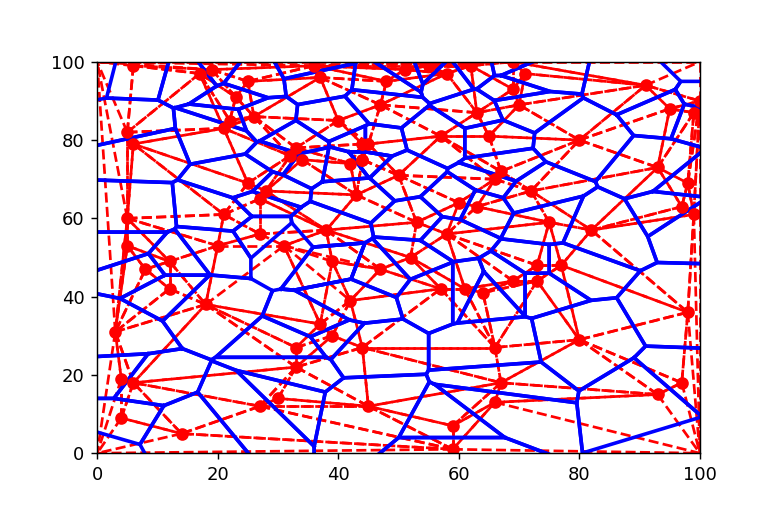

In [19]:
# Delaunay Triangulation and Voronoi Tessellation Example
# randomly insert a set of points
# using matplotlib to plot the delaunay triangles and voronoi polygons.

import random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

%matplotlib notebook


# Draw the delaunay triangles
def draw_delaunay(builder, sites):
    for site in sites:
        vpList = builder.getSiteDelaunay(site)
        for vp in vpList:
            plt.plot([site.x,vp.x], [site.y,vp.y], 'r--')

# Draw the voronoi polygons
def draw_voronoi(builder, sites):
    for site in sites:
        vpList = builder.getSiteVoronoi(site)
        vpList.append(vpList[0])
        plt.plot([p.x for p in vpList], [p.y for p in vpList], 'b', lw=2)

# initialize the TIN builder with the test range of X=[0,100] and Y=[0,100]
builder = TinBuilder(0.0, 100.0, 0.0, 100.0)

# randomly generate a set of points
sites = []
num = 100
i = 0
while i < num:
    site = Site(random.randint(0,100), random.randint(0,100))
    #print(site.x, site.y)
    site.sitenum = i
    sites.append(site)
    edge = builder.insertSite(site)
    if (edge != None):
        i += 1
    
# output the TIN results
draw_delaunay(builder, sites)
draw_voronoi(builder, sites)

plt.plot([p.x for p in sites], [p.y for p in sites], 'ro')
plt.axis([0,100,0,100])
plt.show()

In [ ]:
# Mean Shift Example

import numpy as np
import cv2

vid = cv2.VideoCapture('resources/images/objTrack.mp4')
# take first frame of the video

ret,frame = vid.read()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

# setup initial location of window
r,h,c,w = 0,50,0,50  # simply hardcoded the values
track_window = (c,r,w,h)

plt.figure("Example 5")
plt.imshow(frame)
plt.title('Binary Contours in an image')
plt.show()

# set up the ROI for tracking


roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            vid.release()
            break
        
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x,y,w,h = track_window
        
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        
        # Turn off the axis
        axis('off')
        
        # Title of the window
        title("Input Stream")
        
        # Display the frame
        imshow(img2)
        show()
        
        # Display the frame until new frame is available
        clear_output(wait=True)
        
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    

Populating the interactive namespace from numpy and matplotlib


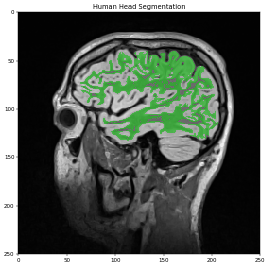

In [12]:
# Medical Imaging and Segmentation Example using ITK

import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline

def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure("Example 6",figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

# Directory where the DICOM files are being stored (in this
# case the 'MyHead' folder). 
pathDicom = "resources/images/MyHead/"

# Z slice of the DICOM files to process. In the interest of
# simplicity, segmentation will be limited to a single 2D
# image but all processes are entirely applicable to the 3D image
idxSlice = 50

# int labels to assign to the segmented white and gray matter.
# These need to be different integers but their values themselves
# don't matter
labelWhiteMatter = 1
labelGrayMatter = 2

reader = SimpleITK.ImageSeriesReader()
filenamesDICOM = reader.GetGDCMSeriesFileNames(pathDicom)
reader.SetFileNames(filenamesDICOM)
imgOriginal = reader.Execute()

imgOriginal = imgOriginal[:,:,idxSlice]

imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                    timeStep=0.125,
                                    numberOfIterations=5)

lstSeeds = [(150,75)]

imgWhiteMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                              seedList=lstSeeds, 
                                              lower=130, 
                                              upper=190,
                                              replaceValue=labelWhiteMatter)

# Rescale 'imgSmooth' and cast it to an integer type to match that of 'imgWhiteMatter'
imgSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth), imgWhiteMatter.GetPixelID())

# Use 'LabelOverlay' to overlay 'imgSmooth' and 'imgWhiteMatter'
sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgWhiteMatter),"Human Head Segmentation")
